In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [3]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
## missing value checking 
obj=df.isnull().sum()
for key, value in obj.iteritems():
    print(key, " ,", value)

Pregnancies  , 0
Glucose  , 0
BloodPressure  , 0
SkinThickness  , 0
Insulin  , 0
BMI  , 0
DiabetesPedigreeFunction  , 0
Age  , 0
Outcome  , 0


#### As SkinThickness and Insuline has zeros so we need to convert it to its means 

In [7]:
mean_SkinThickness=df["SkinThickness"].mean()
mean_SkinThickness

20.536458333333332

In [11]:
df["SkinThickness"]=np.where(df["SkinThickness"]==0,mean_SkinThickness,
                             df["SkinThickness"].values)

In [15]:
df["Insulin"]=np.where(df["Insulin"]==0,df["Insulin"].mean(),df["Insulin"].values)

In [17]:
## finding the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


<AxesSubplot:>

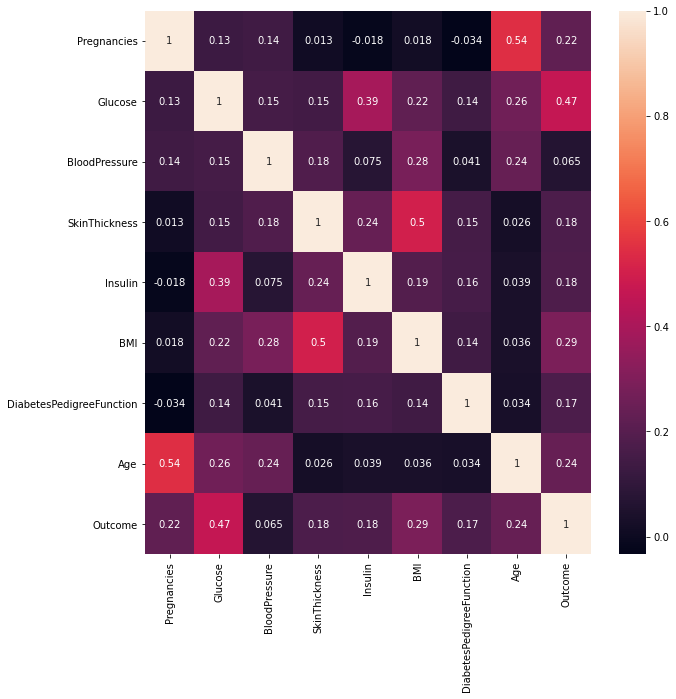

In [22]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

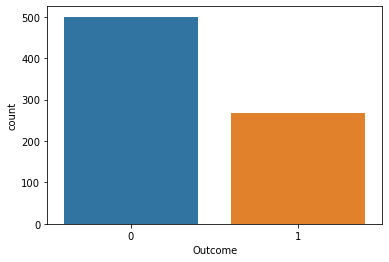

In [28]:
# Checking balance or imbalance dataset 
sns.countplot(df["Outcome"])

In [19]:
## seperate the independend variable 
X=df.iloc[:,[0,1,2,3,4,5,6,7]]
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35.000000,79.799479,33.6,0.627,50
1,1,85,66,29.000000,79.799479,26.6,0.351,31
2,8,183,64,20.536458,79.799479,23.3,0.672,32
3,1,89,66,23.000000,94.000000,28.1,0.167,21
4,0,137,40,35.000000,168.000000,43.1,2.288,33


In [20]:
# dependant feature
y=df.iloc[:,-1]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [23]:
## feature scaling 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [24]:
X_std=scaler.fit_transform(X)
X_std

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [25]:
X_std=pd.DataFrame(X_std,columns=X.columns)
X_std.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.872057,-0.417768,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.248678,-0.417768,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-0.630654,-0.417768,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,-0.374700,-0.265107,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.872057,0.530423,1.409746,5.484909,-0.020496


In [31]:
# Train test split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=.30,random_state=1)
print("The Train size is ",X_train.shape)
print("The Test size is ",X_test.shape)

The Train size is  (537, 8)
The Test size is  (231, 8)


#### Logistic regression with default threshold value  

In [26]:
from sklearn.linear_model import LogisticRegression
logis_d=LogisticRegression()

In [32]:
logis_d.fit(X_train,y_train)

LogisticRegression()

In [33]:
y_pred=logis_d.predict(X_test)

In [34]:
## Performance metrics 
from sklearn import metrics
metrics.confusion_matrix(y_test,y_pred)

array([[132,  14],
       [ 37,  48]], dtype=int64)

###### As it is a imbalance dataset plus it is a medical problem we will be focus on reducing type 2 error of False Negative 


In [36]:
print("The Recall is ",metrics.recall_score(y_test,y_pred))

The Recall is  0.5647058823529412


In [37]:
print("The Precision is ", metrics.precision_score(y_test,y_pred))

The Precision is  0.7741935483870968


In [38]:
# as we have to focus on False negative to beta will be 2
print("The F beta=2 is ",metrics.fbeta_score(y_test,y_pred,beta=2))

The F beta=2 is  0.5970149253731344


## ROC and AUC 

In [40]:
y_prob=logis_d.predict_proba(X_test)

In [44]:
print("The AUC is ",metrics.roc_auc_score(y_test,y_prob[:,1]))

The AUC is  0.863013698630137


In [45]:
FPR,TPR,Thes=metrics.roc_curve(y_test,y_prob[:,1])

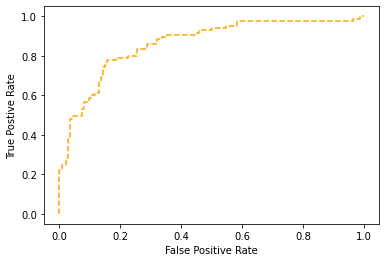

In [51]:
plt.plot(FPR, TPR, linestyle='--',color='orange', label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Postive Rate")
plt.show()

Text(0, 0.5, 'True positive')

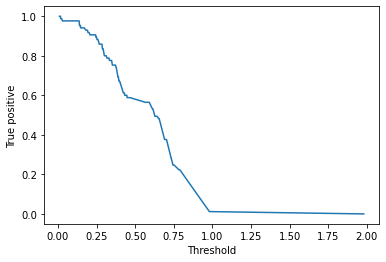

In [59]:
## Threshold 
plt.plot(Thes,TPR)
plt.xlabel("Threshold")
plt.ylabel("True positive")

In [60]:
y_pred2=y_prob[:,1]

In [62]:
## Converting the threshold to 0 or 1
y_pred2=np.where(y_pred2>0.25,1,0)

In [63]:
print("The new Recall is ", metrics.recall_score(y_test,y_pred2))

The new Recall is  0.8823529411764706


In [64]:
metrics.confusion_matrix(y_test,y_pred2)

array([[97, 49],
       [10, 75]], dtype=int64)